In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define all 23 column names
cols = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", 
    "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", 
    "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", 
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", 
    "veil-color", "ring-number", "ring-type", "spore-print-color", 
    "population", "habitat"
]

# Read the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
df = pd.read_csv(url, header=None, names=cols)

# Inspect the first few rows
print(df.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [2]:
# Create a subset with the required columns
# You can change 'habitat' to any other column you find interesting
subset = df[['class', 'odor', 'habitat']].copy()

print(subset.head())

  class odor habitat
0     p    p       u
1     e    a       g
2     e    l       m
3     p    p       u
4     e    n       g


In [3]:
# Mappings
class_map = {'e': 0, 'p': 1}
odor_map = {'a': 0, 'l': 1, 'c': 2, 'y': 3, 'f': 4, 'm': 5, 'n': 6, 'p': 7, 's': 8}
habitat_map = {'g': 0, 'l': 1, 'm': 2, 'p': 3, 'u': 4, 'w': 5, 'd': 6}

# Apply mappings
subset['class_num'] = subset['class'].map(class_map)
subset['odor_num'] = subset['odor'].map(odor_map)
subset['habitat_num'] = subset['habitat'].map(habitat_map)

# Check the results
print(subset.head())

  class odor habitat  class_num  odor_num  habitat_num
0     p    p       u          1         7            4
1     e    a       g          0         0            0
2     e    l       m          0         1            2
3     p    p       u          1         7            4
4     e    n       g          0         6            0


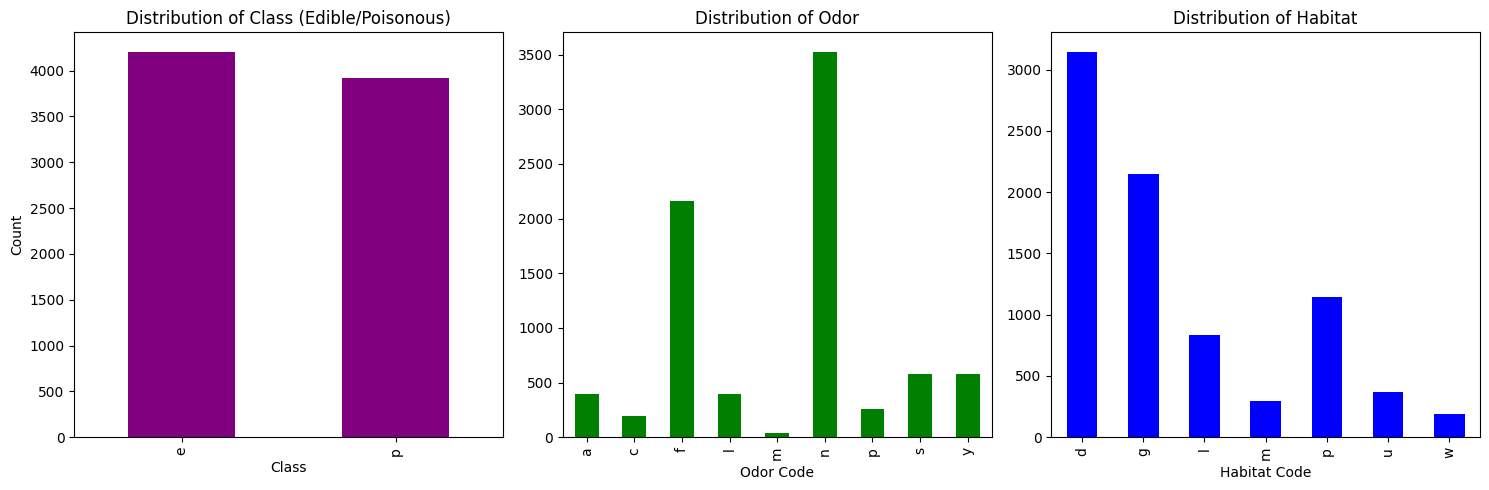

In [4]:
# Plot distribution for Class
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
subset['class'].value_counts().plot(kind='bar', color='purple')
plt.title('Distribution of Class (Edible/Poisonous)')
plt.xlabel('Class')
plt.ylabel('Count')

# Plot distribution for Odor
plt.subplot(1, 3, 2)
subset['odor'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Distribution of Odor')
plt.xlabel('Odor Code')

# Plot distribution for Habitat
plt.subplot(1, 3, 3)
subset['habitat'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title('Distribution of Habitat')
plt.xlabel('Habitat Code')

plt.tight_layout()
plt.show()

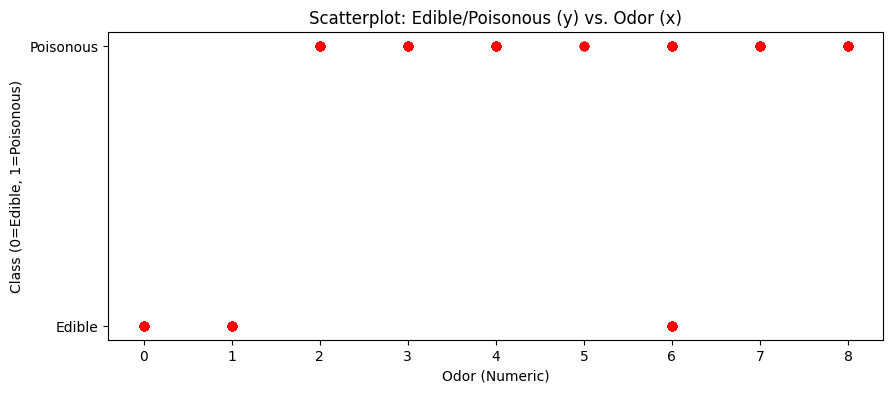

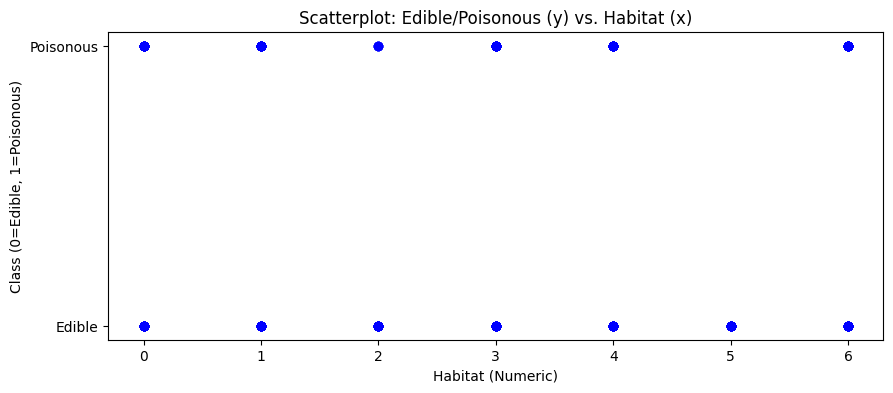

In [5]:
# Scatterplot: Class vs Odor
plt.figure(figsize=(10, 4))
plt.scatter(subset['odor_num'], subset['class_num'], alpha=0.1, c='red')
plt.title('Scatterplot: Edible/Poisonous (y) vs. Odor (x)')
plt.xlabel('Odor (Numeric)')
plt.ylabel('Class (0=Edible, 1=Poisonous)')
plt.yticks([0, 1], ['Edible', 'Poisonous'])
plt.show()

# Scatterplot: Class vs Habitat
plt.figure(figsize=(10, 4))
plt.scatter(subset['habitat_num'], subset['class_num'], alpha=0.1, c='blue')
plt.title('Scatterplot: Edible/Poisonous (y) vs. Habitat (x)')
plt.xlabel('Habitat (Numeric)')
plt.ylabel('Class (0=Edible, 1=Poisonous)')
plt.yticks([0, 1], ['Edible', 'Poisonous'])
plt.show()

Example for Odor: "The scatterplot shows a clear separation. For example, odor '5' (musty) aligns entirely with class '1' (poisonous), while odor '0' (almond) aligns with class '0' (edible). This suggests odor will be a very strong predictor."

Example for Habitat: "The points for habitat are more spread out. Both edible and poisonous mushrooms are found in habitat '0' (grasses). This suggests habitat is a useful clue but not a perfect predictor on its own."